In [1]:
# Data Cleaning
import pandas as pd
import numpy as np

## Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(context = 'notebook' , style = 'whitegrid' , palette = 'Set2')
%matplotlib inline

# Preprocessing
from sklearn.preprocessing import LabelEncoder

random_state=42

In [2]:
# Load dataset and drop unwanted columns
df = pd.read_csv('stroke-data.csv', header=None)
df=df[0].str.split(',', expand=True)
df.rename(columns=df.iloc[0], inplace=True)
df=df.drop([0]).reset_index(drop=True)
df.drop(columns=['id'], inplace=True)

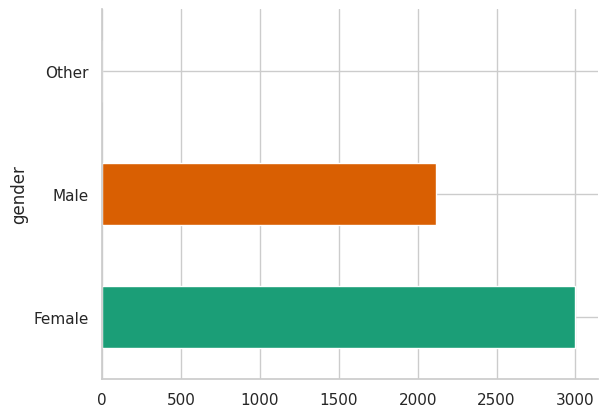

In [3]:
# plot gender

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   gender             5110 non-null   object
 1   age                5110 non-null   object
 2   hypertension       5110 non-null   object
 3   heart_disease      5110 non-null   object
 4   ever_married       5110 non-null   object
 5   work_type          5110 non-null   object
 6   Residence_type     5110 non-null   object
 7   avg_glucose_level  5110 non-null   object
 8   bmi                5110 non-null   object
 9   smoking_status     5110 non-null   object
 10  stroke             5110 non-null   object
dtypes: object(11)
memory usage: 439.3+ KB


In [5]:
df.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110,5110,5110,5110,5110,5110,5110,5110,5110,5110,5110
unique,3,104,2,2,2,5,2,3979,419,4,2
top,Female,78,0,0,Yes,Private,Urban,93.88,N/A,never smoked,0
freq,2994,102,4612,4834,3353,2925,2596,6,201,1892,4861


In [6]:
df.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,N/A,never smoked,1


In [7]:
df.nunique()

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   419
smoking_status          4
stroke                  2
dtype: int64

In [8]:
for col in df.select_dtypes(include=[np.number]).columns:
    print(f"{col} has {df[col].nunique()} unique value")
print('-'*10)
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col} has {df[col].nunique()} unique value")

----------
gender has 3 unique value
age has 104 unique value
hypertension has 2 unique value
heart_disease has 2 unique value
ever_married has 2 unique value
work_type has 5 unique value
Residence_type has 2 unique value
avg_glucose_level has 3979 unique value
bmi has 419 unique value
smoking_status has 4 unique value
stroke has 2 unique value


In [9]:
df.drop(df[df['gender'] == 'Other'].index, inplace = True)


In [ ]:
# Preprocessing
df_1=df.copy()

le=LabelEncoder()
df_1.gender=le.fit_transform(df_1.gender)
df_1.ever_married=le.fit_transform(df_1.ever_married)
df_1.work_type=le.fit_transform(df_1.work_type)
df_1.Residence_type=le.fit_transform(df_1.Residence_type)
df_1.smoking_status=le.fit_transform(df_1.smoking_status)

df_1['bmi']=df_1['bmi'].replace(to_replace = 'N/A', value = 0)
df_1=df_1.apply(lambda x: x.astype(float))

df_1.head()

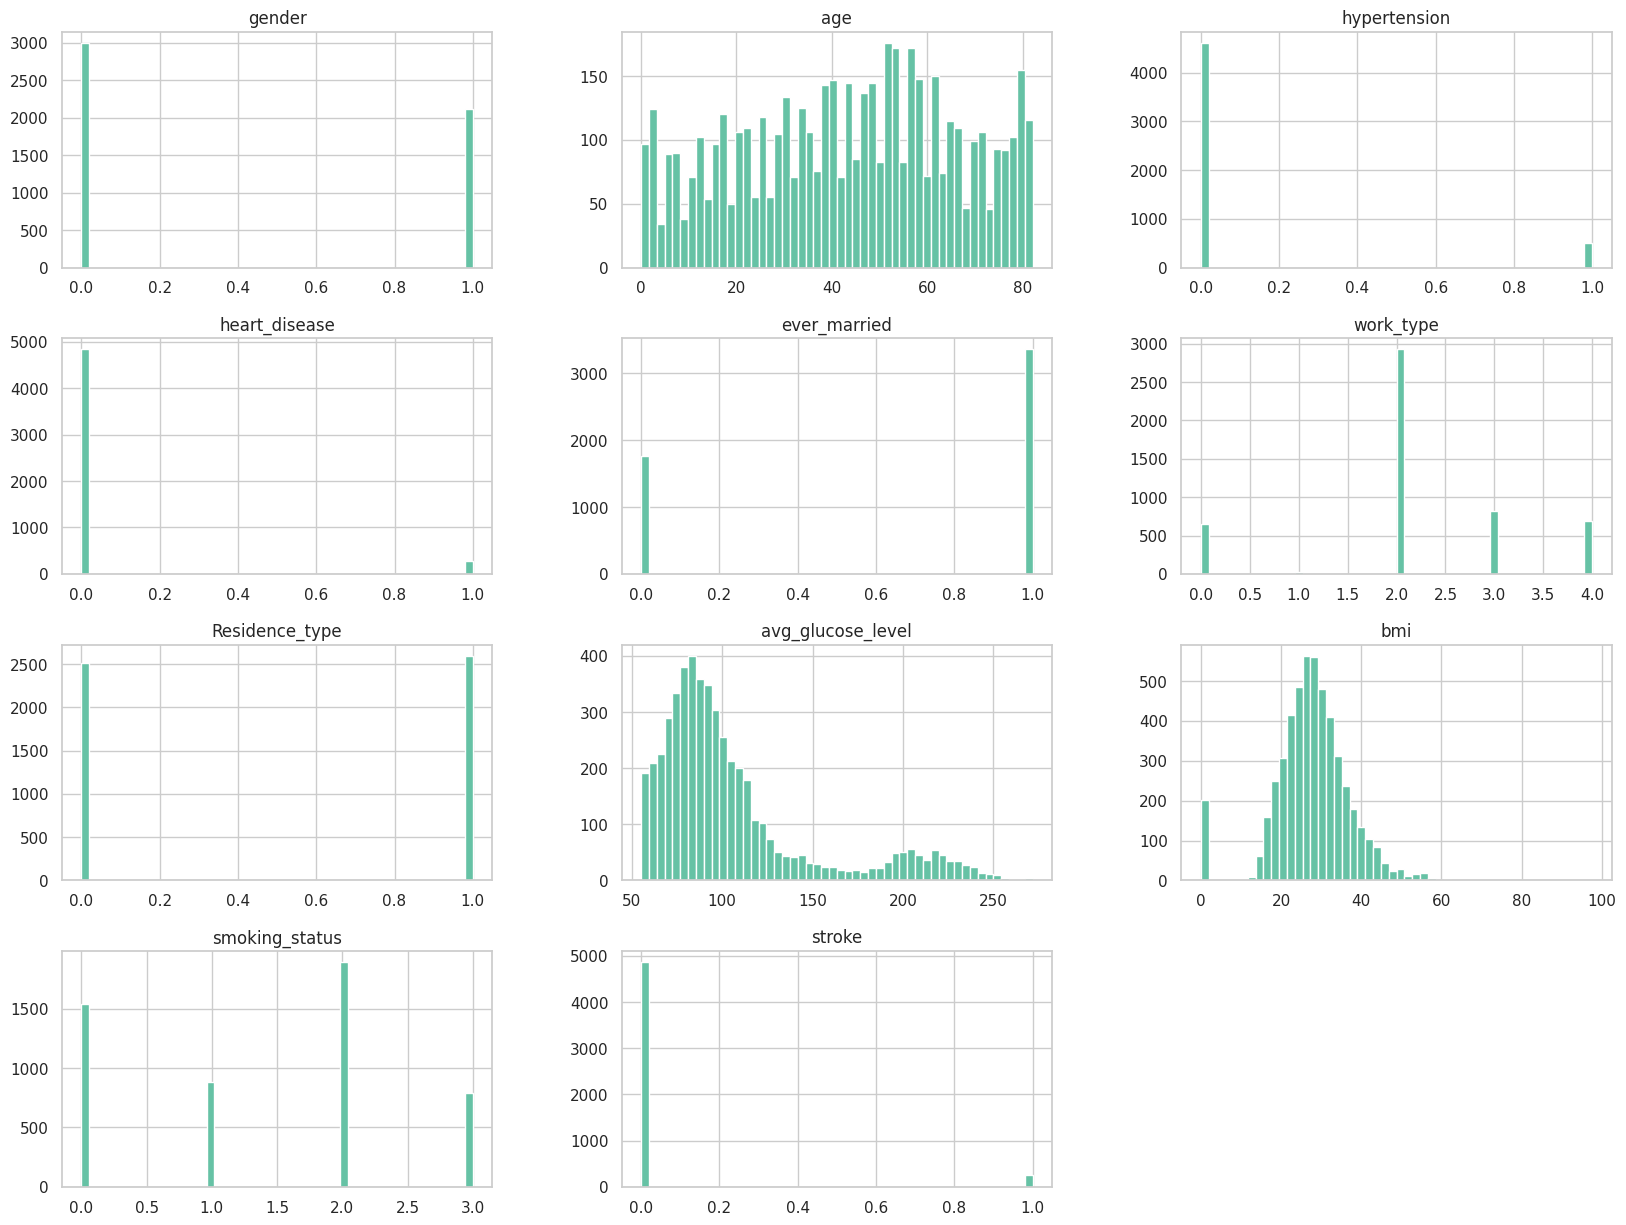

In [11]:
# Histogram
df_1.hist(bins=50,figsize=(20,15))
plt.show()

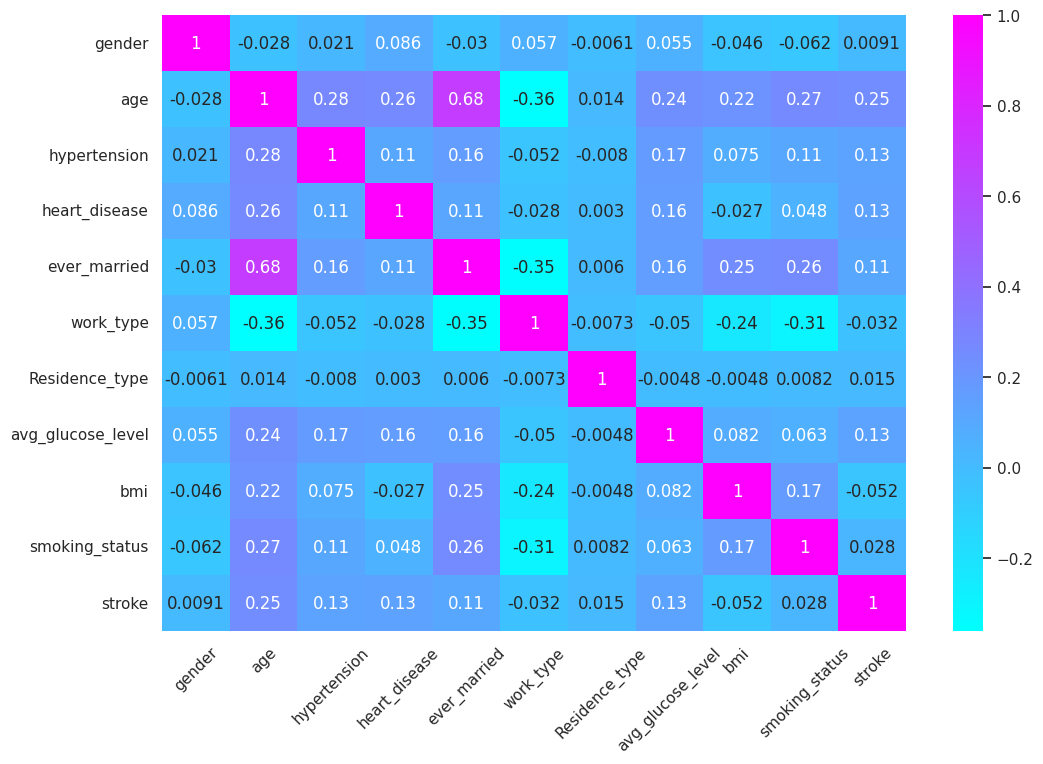

In [12]:
# Correlation and Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_1.corr(), annot=True,cmap='cool')
plt.xticks(rotation=45);

In [13]:
# train, validation and test data (60%,20%,20%)
from sklearn.model_selection import train_test_split
X = df_1.drop(['stroke'], axis =1)
y = df_1['stroke']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=random_state)

X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=random_state)


In [ ]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('X_val shape: ', X_val.shape)
print()
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)
print('y_val shape: ', y_val.shape)

In [15]:
X_train=X_train.values
X_val=X_val.values
X_test=X_test.values

y_train=y_train.values
y_test=y_test.values
y_val=y_val.values

In [16]:
# NN Model
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout
from tensorflow.keras.layers import Dropout, Dense, Input, concatenate
from tensorflow.keras.regularizers import L2, L1


In [ ]:
model = Sequential()
# Add layers
regularizer = keras.regularizers.l2(0.01)

model.add(Input(shape=X_train[1].shape))
model.add(Dense(64, activation='elu')) #Dense_1
model.add(Dropout(0.3))
model.add(Dense(32, activation='elu', kernel_regularizer=regularizer)) #Dense_2
model.add(Dense(16, activation='elu', kernel_regularizer=regularizer)) #Dense_3
model.add(Dropout(0.5))
model.add(Dense(16, activation='elu', kernel_regularizer=regularizer)) #Dense_4
model.add(Dense(1, activation='sigmoid', kernel_regularizer=regularizer)) #output


# Replace None with your choice of loss function and optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

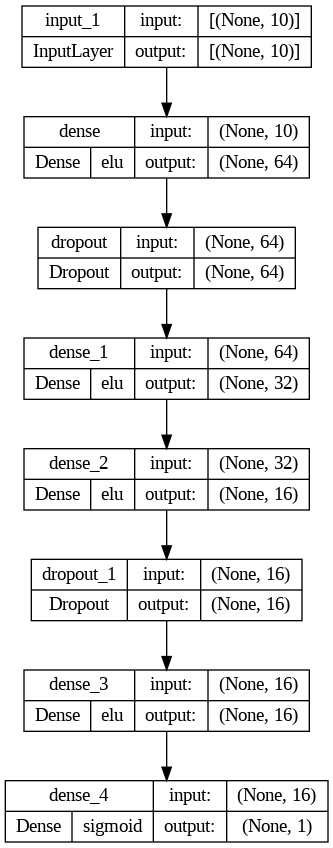

In [18]:
keras.utils.plot_model(model, show_shapes=True, show_layer_activations=True, to_file='ans_sequential_model.png')

In [ ]:
history = model.fit(X_train, y_train,
                     validation_data=(X_val, y_val),
                     batch_size=32,
                     epochs=100,
                     shuffle=True)

In [20]:
# Evaluation and visualization
from sklearn.metrics import confusion_matrix, classification_report

In [21]:
loss, accuracy = model.evaluate(X_train, y_train)
print(f"Train Loss: {loss:.4f}, Train Accuracy: {accuracy:.4f}")

96/96 [==============================] - 0s 1ms/step - loss: 0.1596 - accuracy: 0.9560
Train Loss: 0.1596, Train Accuracy: 0.9560


In [22]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

32/32 [==============================] - 0s 2ms/step - loss: 0.1806 - accuracy: 0.9511
Test Loss: 0.1806, Test Accuracy: 0.9511


In [23]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

32/32 [==============================] - 0s 2ms/step


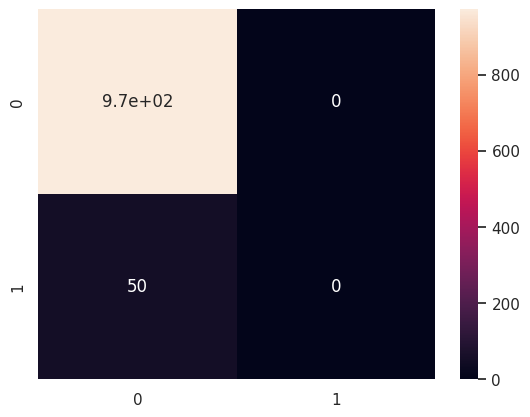

In [24]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
plt.savefig('confusion.png')

In [28]:
print(classification_report(y_test, y_pred))

In [ ]:
model.summary()

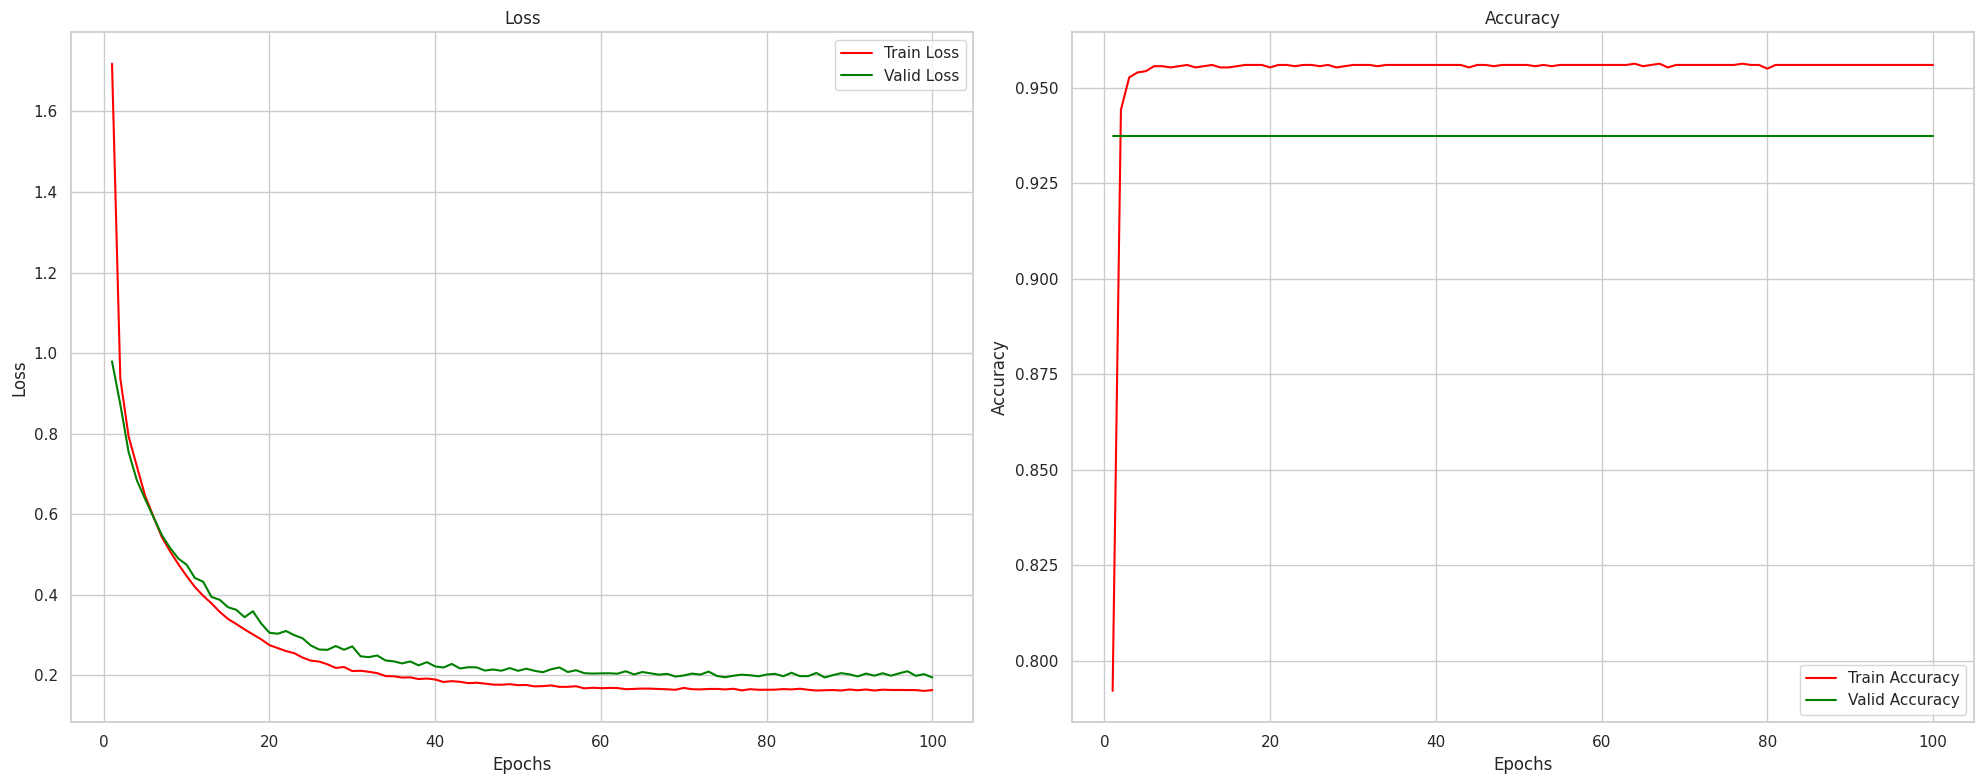

In [27]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = [i+1 for i in range(len(tr_acc))]

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, tr_loss, 'r', label='Train Loss')
plt.plot(epochs, val_loss, 'g', label='Valid Loss')
plt.title('Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs, tr_acc, 'r', label='Train Accuracy')
plt.plot(epochs, val_acc, 'g', label='Valid Accuracy')
plt.title('Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()